# OpenET SSEBop
## Collection "Interpolate" Examples

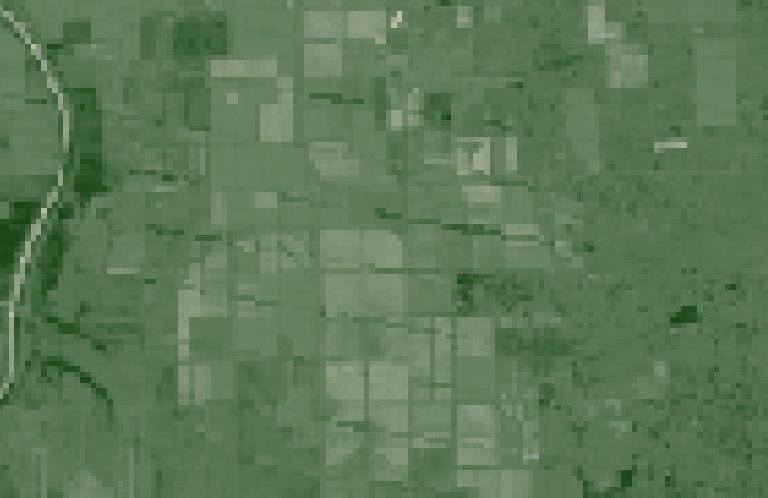

In [1]:
import ee
from pprint import pprint
from datetime import datetime, timedelta
from dateutil.rrule import rrule, DAILY

from IPython.display import Image as Img
from map.openet.collection import Collection
# from map.openet.collection import build_target

ee.Initialize(use_cloud_api=True)

ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C',
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']

image_size = 768
landsat_cs = 30

collections = ['LANDSAT/LC08/C01/T1_SR',
               'LANDSAT/LE07/C01/T1_SR',
               'LANDSAT/LT05/C01/T1_SR']

year = 2017
s = datetime(year, 6, 1)
e = datetime(year, 8, 1)
d_times = [d for d in rrule(dtstart=s, until=e, interval=15, freq=DAILY)]
# d_strings = [(x.strftime('%Y-%m-%d'), y.strftime('%Y-%m-%d'), x) for x, y in d_times]

cloud_cover = 100
interp_days = 32
test_xy = [-121.5265, 38.7399]
test_point = ee.Geometry.Point(test_xy)

# study_area = ee.Geometry.Rectangle(-122.00, 38.60, -121.00, 39.0)
study_area = ee.Geometry.Rectangle(
    test_xy[0] - 0.08, test_xy[1] - 0.04,
    test_xy[0] + 0.08, test_xy[1] + 0.04)
study_region = study_area.bounds(1, 'EPSG:4326')
study_crs = 'EPSG:32610'

model_obj = Collection(
    collections=collections,
    start_date=s,
    end_date=e,
    geometry=test_point,
    cloud_cover_max=70)

variables_ = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'tir', 'ndvi']
daily_coll = model_obj.interpolate(variables=variables_,
                                   interp_days=interp_days)
image_url = ee.Image(daily_coll.first().select(['ndvi'])).reproject(crs=study_crs, scale=100)\
    .getThumbURL({'min': -1.0, 'max': 1.0, 'palette': ndvi_palette,
                  'region': study_region, 'dimensions': image_size})
Img(image_url, embed=True, format='png')


